In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Parameters

lambda_events = 5

mu_severity = 2.0

sigma_severity = 0.5

num_simulations = 10000

In [5]:
total_losses = []

for _ in range(num_simulations):

    num_events = np.random.poisson(lambda_events)

    if num_events > 0:
        severities = np.random.lognormal(mean=mu_severity, sigma=sigma_severity, size=num_events)
        total_loss = np.sum(severities)
    else:
        total_loss = 0
    
    total_losses.append(total_loss)


In [6]:
total_losses = np.array(total_losses)

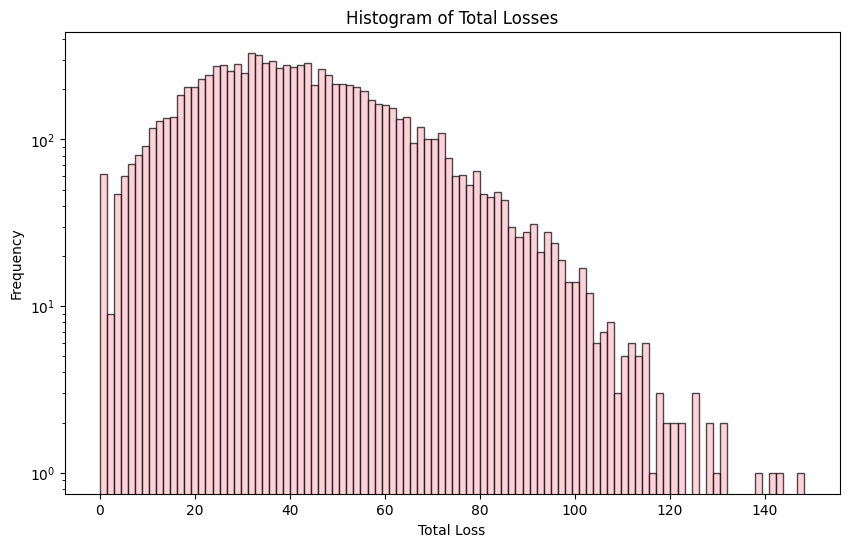

In [28]:
plt.figure(figsize=(10,6))
plt.hist(total_losses, bins = 100, color='pink', edgecolor = 'black', alpha = 0.7)
plt.title('Histogram of Total Losses')
plt.xlabel('Total Loss')
plt.ylabel('Frequency')
plt.yscale('log') #log scale to see tail better
plt.show()


In [55]:
# Plot CDF

sorted_losses = np.sort(total_losses)

ecdf = np.arange(1,num_simulations+1)/num_simulations


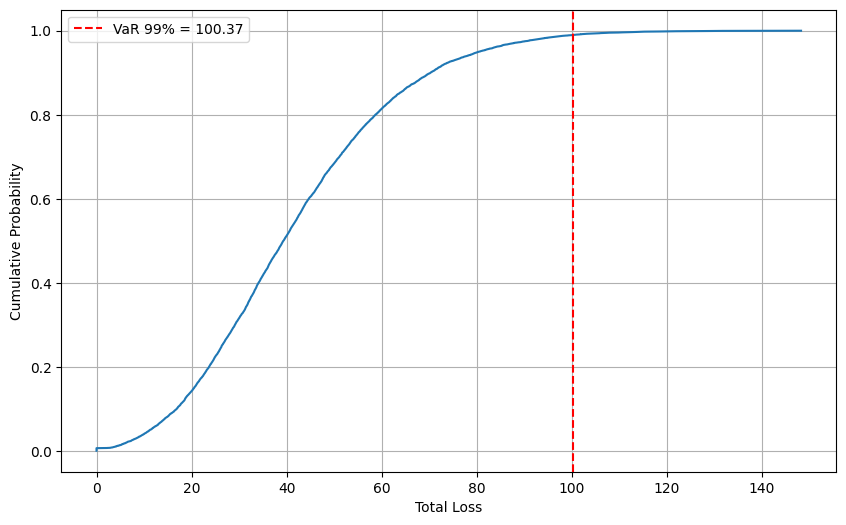

In [69]:
plt.figure(figsize=(10,6))
plt.plot(sorted_losses, ecdf)
plt.xlabel('Total Loss')
plt.ylabel('Cumulative Probability')
plt.grid(True)
#plt.show()

# Mark 99% VaR
var_99 = np.percentile(total_losses, 99)

plt.axvline(var_99, color = 'red', linestyle = '--', label = f'VaR 99% = {var_99:.2f}')
plt.legend()
plt.show()